In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

In [51]:
EXAMPLE_IMG = "./examples/tomato.JPG"

In [60]:
def apply_mask(image, mask):
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    return segmented_image

## Otsu Thresholding

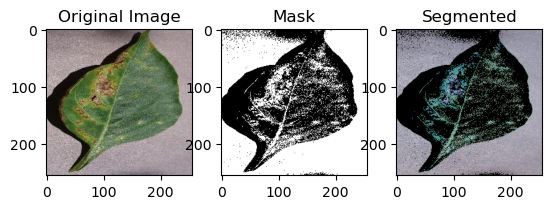

In [87]:
# Load the image
image = cv2.imread(EXAMPLE_IMG, 1)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
_, binary_image = cv2.threshold(image_gray, 120, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
segmented_image = apply_mask(image, mask=binary_image)

# Display the result
plt.subplot(131);plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));plt.title('Original Image')
plt.subplot(132);plt.imshow(binary_image, cmap='gray');plt.title('Mask')
plt.subplot(133);plt.imshow(segmented_image, cmap='gray');plt.title('Segmented')
plt.show()

## Contour Detection

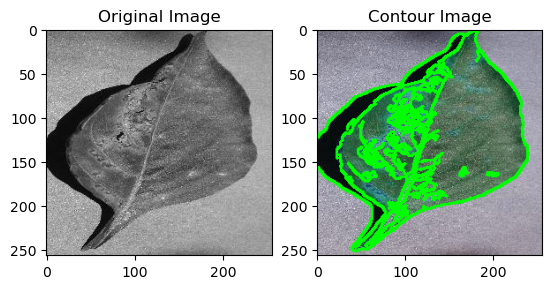

In [53]:
# Load the image
image = cv2.imread(EXAMPLE_IMG)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

# Display the result
plt.subplot(121);plt.imshow(image_gray, cmap='gray');plt.title('Original Image')
plt.subplot(122);plt.imshow(contour_image, cmap='gray');plt.title('Contour Image')
plt.show()

# K-Means

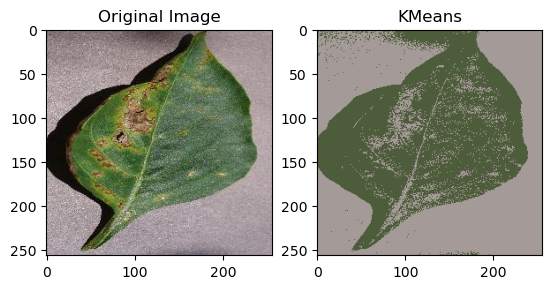

In [74]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit values
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_rgb.shape)

plt.subplot(121);plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));plt.title('Original Image')
plt.subplot(122);plt.imshow(segmented_image, cmap='gray');plt.title('KMeans')
plt.show()

## Coba 1

In [75]:
# Read image
img = cv2.imread('img.JPG')
hh, ww = img.shape[:2]

# threshold on white
# Define lower and uppper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(result)

[ WARN:0@56469.946] global loadsave.cpp:248 findDecoder imread_('img.JPG'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'